In [40]:
from pathlib import Path

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_theme()

import sys
sys.path.append("../../../src")
from rmsf import get_rmsfs

In [41]:
n_res = 306

pdb_dir = Path("../data/202/pdbs/13")
pdb_files = list(pdb_dir.glob("*.pdb"))
print(pdb_files)

[PosixPath('../data/202/pdbs/13/7.pdb'), PosixPath('../data/202/pdbs/13/6.pdb'), PosixPath('../data/202/pdbs/13/4.pdb'), PosixPath('../data/202/pdbs/13/5.pdb'), PosixPath('../data/202/pdbs/13/1.pdb'), PosixPath('../data/202/pdbs/13/0.pdb'), PosixPath('../data/202/pdbs/13/2.pdb'), PosixPath('../data/202/pdbs/13/3.pdb'), PosixPath('../data/202/pdbs/13/8.pdb'), PosixPath('../data/202/pdbs/13/9.pdb')]


In [ ]:
rmsfs = get_rmsfs(pdb_files)

In [36]:
mat = np.zeros((len(pdb_files), n_res, 3))
for i in range(len(pdb_files)):
    pdb_file = pdb_files[i]
    m = IMP.Model()
    h = IMP.atom.read_pdb(str(pdb_file), m, IMP.atom.CAlphaPDBSelector())

    for j in range(1,n_res+1):
        pid = IMP.atom.Selection(h, residue_index=j, atom_type=IMP.atom.AtomType("CA")).get_selected_particles()[0]
        xyz = IMP.core.XYZR(m, pid)
        mat[i,j-1,:] = xyz.get_coordinates()


In [37]:
## normalize
for i in range(n_res):
    for j in range(3):
        mat[:,i,j] = mat[:,i,j] - np.mean(mat[:,i,j])


In [38]:
## calculate fluctuations
rmsfs = list()
for i in range(n_res):
    rmsf = 0
    for j in range(len(pdb_files)):
        rmsf += np.linalg.norm(mat[j,i,:])

    rmsf /= len(pdb_files)

    # print(i, rmsf)
    rmsfs.append(rmsf)



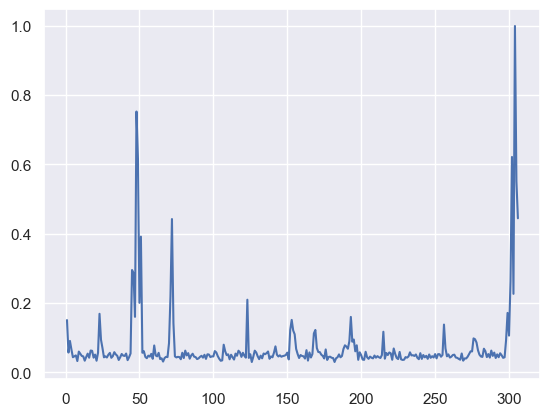

In [39]:
plt.plot(range(1,n_res+1), rmsfs)
plt.savefig(Path(Path.home(), "Desktop/plot.png"))